Generate a movie for a single trajectory.

In [1]:
import hydra

import numpy as np
import pandas as pd
import plotnine as pn

from hydra.core.global_hydra import GlobalHydra

# Lets us import ibsg modules
import sys
sys.path.append("/pub/nimel/projects/ibsg/src")

from game.game import Game

In [2]:
all_data_fp = "../../analysis_data/all_data.csv"

df = pd.read_csv(all_data_fp)
df

/tmp/ipykernel_2161925/2574174746.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.


,run_num,iteration,complexity,accuracy,distortion,mse,eu_gamma,kl_eb,min_epsilon,min_epsilon_index,...,eu_gamma=1.8738174228603868,eu_gamma=2.310129700083158,eu_gamma=2.848035868435805,eu_gamma=3.511191734215127,eu_gamma=4.328761281083061,eu_gamma=5.3366992312063015,eu_gamma=6.5793322465756825,eu_gamma=8.11130830789689,eu_gamma=10.0,eu_gamma=1e+100
0,0.0,3734.0,0.000001,0.000001,3.199885,1654.783057,1.0,0.000843,1.250845e-09,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.281837,0.072019,3.237316,1673.603978,1.0,0.370218,2.095223e-01,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2.0,0.050169,0.040650,3.225527,1673.101459,1.0,0.094817,9.486669e-03,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3.0,0.035042,0.031250,3.220544,1672.732027,1.0,0.068528,3.771451e-03,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,4.0,0.028473,0.026326,3.217649,1672.423861,1.0,0.056270,2.130624e-03,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292947,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.294524,0.273155,0.256964,0.245958,0.239426,0.236147,0.234807,0.23438,0.23428,0.234263
292948,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.294524,0.273155,0.256964,0.245958,0.239426,0.236147,0.234807,0.23438,0.23428,0.234263
292949,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.294524,0.273155,0.256964,0.245958,0.239426,0.236147,0.234807,0.23438,0.23428,0.234263
292950,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.294524,0.273155,0.256964,0.245958,0.239426,0.236147,0.234807,0.23438,0.23428,0.234263


In [3]:
overrides = [
    "game.universe=100",
    "game.num_signals=100",
    "game.meaning_dist_pi=0.5",
    "simulation/dynamics=imprecise_conditional_imitation",
    "simulation.dynamics.imprecise_imitation_alpha=0.5",
    "simulation.dynamics.max_its=1e5",
] # n.b.: do not include multirun overrides, we will filter from columns in the dataframe.

# Global initialization
GlobalHydra.instance().clear() # from previous runs of notebook
hydra.initialize(version_base=None, config_path="../../conf")
config = hydra.compose(
    config_name="config",
    overrides=overrides,
)


In [4]:
game = Game.from_hydra(config, cwd="/pub/nimel/projects/ibsg/data")

In [5]:
def get_df_subsetted_by_meaning_dists(df: pd.DataFrame, config) -> pd.DataFrame:
    """Return a subset of the data consistent with the specifications in the curve_metadata config."""
    curve_metadata = config.game

    # See src/get_all_data.py
    universe = df["universe"].astype(str) == str(curve_metadata.universe)
    prior = df["prior"].astype(str) == str(curve_metadata.prior)
    num_signals = df["num_signals"] == curve_metadata.num_signals # this is prob not necessary
    distance = df["distance"] == curve_metadata.distance

    meaning_dist_pi = df["meaning_dist_pi"] == curve_metadata.meaning_dist_pi

    imprecise_imitation_alpha = df["imprecise_imitation_alpha"].isin([curve_metadata.meaning_dist_pi, np.nan]) # allows curve, and constraints to be the same as curve.

    max_its = df["max_its"].isin([config.simulation.dynamics.max_its, np.nan]) # allows curve

    # temporary filtering
    not_binary = df["discriminative_need_gamma"] != 1e100

    df_subsetted = df[universe & prior & num_signals & num_signals & distance & meaning_dist_pi & imprecise_imitation_alpha & max_its & not_binary]

    return df_subsetted

In [6]:
# visualize the curve!
df = get_df_subsetted_by_meaning_dists(df, config)
df

,run_num,iteration,complexity,accuracy,distortion,mse,eu_gamma,kl_eb,min_epsilon,min_epsilon_index,...,eu_gamma=1.8738174228603868,eu_gamma=2.310129700083158,eu_gamma=2.848035868435805,eu_gamma=3.511191734215127,eu_gamma=4.328761281083061,eu_gamma=5.3366992312063015,eu_gamma=6.5793322465756825,eu_gamma=8.11130830789689,eu_gamma=10.0,eu_gamma=1e+100
0,0.0,3734.0,0.000001,0.000001,3.199885,1654.783057,1.0,0.000843,1.250845e-09,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.281837,0.072019,3.237316,1673.603978,1.0,0.370218,2.095223e-01,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2.0,0.050169,0.040650,3.225527,1673.101459,1.0,0.094817,9.486669e-03,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3.0,0.035042,0.031250,3.220544,1672.732027,1.0,0.068528,3.771451e-03,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,4.0,0.028473,0.026326,3.217649,1672.423861,1.0,0.056270,2.130624e-03,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292947,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.294524,0.273155,0.256964,0.245958,0.239426,0.236147,0.234807,0.23438,0.23428,0.234263
292948,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.294524,0.273155,0.256964,0.245958,0.239426,0.236147,0.234807,0.23438,0.23428,0.234263
292949,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.294524,0.273155,0.256964,0.245958,0.239426,0.236147,0.234807,0.23438,0.23428,0.234263
292950,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.294524,0.273155,0.256964,0.245958,0.239426,0.236147,0.234807,0.23438,0.23428,0.234263


In [7]:
df.meaning_dist_pi.unique()

array([0.5])

In [8]:
# FURTHER restrict SIMULATION points to the settings we specified in config

df_emergent = df[(df["point_type"].isin(["simulation", "trajectory"]))]
#  & (df["discriminative_need_gamma"] == config.game.discriminative_need_gamma) & (df["population_init_gamma"] == config.simulation.dynamics.population_init_gamma)

#  & (df["seed"] == config.seed)

df_emergent

,run_num,iteration,complexity,accuracy,distortion,mse,eu_gamma,kl_eb,min_epsilon,min_epsilon_index,...,eu_gamma=1.8738174228603868,eu_gamma=2.310129700083158,eu_gamma=2.848035868435805,eu_gamma=3.511191734215127,eu_gamma=4.328761281083061,eu_gamma=5.3366992312063015,eu_gamma=6.5793322465756825,eu_gamma=8.11130830789689,eu_gamma=10.0,eu_gamma=1e+100
0,0.0,3734.0,0.000001,0.000001,3.199885,1654.783057,1.000000,0.000843,1.250845e-09,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.281837,0.072019,3.237316,1673.603978,1.000000,0.370218,2.095223e-01,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2.0,0.050169,0.040650,3.225527,1673.101459,1.000000,0.094817,9.486669e-03,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3.0,0.035042,0.031250,3.220544,1672.732027,1.000000,0.068528,3.771451e-03,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,4.0,0.028473,0.026326,3.217649,1672.423861,1.000000,0.056270,2.130624e-03,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288110,0.0,57223.0,4.128355,3.843373,34.131284,5.807811,0.167877,0.053761,3.132090e-04,455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288111,0.0,61359.0,4.128355,3.843373,34.130646,5.807810,0.167877,0.053761,3.132060e-04,455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288112,0.0,65793.0,4.128355,3.843373,34.130501,5.807810,0.167877,0.053761,3.132032e-04,455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288113,0.0,70548.0,4.128355,3.843373,34.130775,5.807810,0.167877,0.053761,3.132007e-04,455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_sim_points = df_emergent[df_emergent["point_type"] == "simulation"]
df_curve_points = df[df["point_type"] == "ib_bound"]
df_traj = df_emergent[df_emergent["point_type"] == "trajectory"]

In [10]:
# convert seed to categorical
df_sim_points.seed = df_sim_points.seed.astype(str)

In [11]:
# df_sim_points.discriminative_need_gamma = df_sim_points.discriminative_need_gamma.astype(str)

In [12]:
# How many iterations are actually saved?
# df_traj[df_traj.eu_gamma == df_traj.eu_gamma.min()]
df_traj[(df_traj.discriminative_need_gamma == df_traj.discriminative_need_gamma.median()) & (df_traj.seed == df_traj.seed.max())]

,run_num,iteration,complexity,accuracy,distortion,mse,eu_gamma,kl_eb,min_epsilon,min_epsilon_index,...,eu_gamma=1.8738174228603868,eu_gamma=2.310129700083158,eu_gamma=2.848035868435805,eu_gamma=3.511191734215127,eu_gamma=4.328761281083061,eu_gamma=5.3366992312063015,eu_gamma=6.5793322465756825,eu_gamma=8.11130830789689,eu_gamma=10.0,eu_gamma=1e+100
145798,0.0,1.0,0.280089,0.071142,3.236585,1661.585846,0.580509,0.356071,0.208653,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145799,0.0,2.0,0.050211,0.040768,3.225644,1537.381594,0.596558,0.103088,0.009411,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145800,0.0,3.0,0.039278,0.035533,3.223731,1429.822743,0.610702,0.125209,0.003722,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145801,0.0,4.0,0.041288,0.039150,3.227204,1334.507336,0.623731,0.179745,0.002113,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145802,0.0,5.0,0.053578,0.052133,3.237640,1246.643500,0.636560,0.246553,0.001410,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145984,0.0,43287.0,1.976456,1.963060,14.121213,82.112842,0.958862,0.004543,0.000023,168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145985,0.0,46415.0,1.976457,1.963061,14.120173,82.112790,0.958862,0.004543,0.000023,168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145986,0.0,49770.0,1.976457,1.963061,14.119135,82.112748,0.958862,0.004543,0.000023,168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145987,0.0,53366.0,1.976458,1.963062,14.118110,82.112714,0.958862,0.004542,0.000023,168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
steps_recorded = df_traj.iteration.unique().astype(int)
len(steps_recorded) # 1-100 and then exponentially spaced afterwards

973

In [14]:
# I need to write a fairly sophisticated method which does the following:

# - for each unique combination of discriminative need gamma and random seed:
# - fill in the missing observations?
# we'll have to do that for all steps less than 200, no?
# - no, that's gonna give us way too many images. what we need is to find out if the steps recorded are the same after 200. 

/data/homezvol0/nimel/.conda/envs/ibsg/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/data/homezvol0/nimel/.conda/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 82 rows containing missing values.


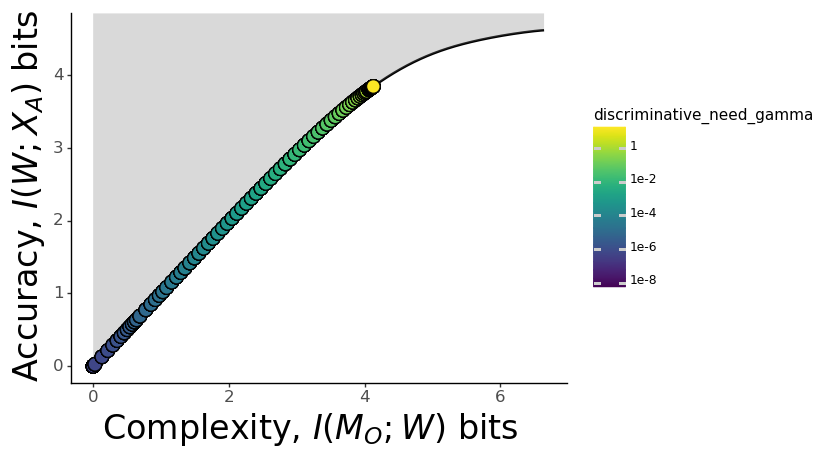

In [15]:
plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_curve_points, mapping=pn.aes(x="complexity", y="accuracy")
    )  
    + pn.geom_line(size=1) # IB curve
    # + pn.geom_point(size=1)
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=np.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # emergent langs
        data=df_sim_points,
        mapping=pn.aes(
            # shape="seed",
            fill="discriminative_need_gamma",
            # fill="imprecise_imitation_gamma",
            # fill="population_init_gamma",
            ),
        # fill = "#440154",
        alpha=0.9,
        size=5,
    )        
    + pn.scale_fill_continuous(trans = "log10")
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M_O;W)$ bits")
    + pn.ylab("Accuracy, $I(W;X_A)$ bits")
    # + pn.ylab("Informativeness, $I(W;U)$ bits")
    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.4),
        # legend_position='none',
    )    
)
print(plot)

In [16]:
def bound_plot_time_step(df_t: pd.DataFrame, t: str) -> pn.ggplot:
    return (
        # Set data and the axes
        pn.ggplot(
            data=df_curve_points, mapping=pn.aes(x="complexity", y="accuracy")
        )  
        + pn.geom_line(size=1) # IB curve
        # + pn.geom_point(size=1)
        + pn.geom_ribbon(
        mapping=pn.aes(
            x="complexity",
            ymin="accuracy",
            ymax=np.inf,
            ),
            fill="gray",
            alpha=0.3,
        )
        + pn.geom_point( # emergent langs
            data=df_t,
        mapping=pn.aes(
            fill="discriminative_need_gamma",
            ),
            # fill = "#440154",
            alpha=0.9,
            size=5,
        )        
        + pn.scale_fill_continuous(trans = "log10")
        + pn.xlim([0,np.log2(100)])
        + pn.xlab("Complexity, $I(M_O;W)$ bits")
        + pn.ylab("Accuracy, $I(W;X_A)$ bits")
        # + pn.ylab("Informativeness, $I(W;U)$ bits")
        + pn.ggtitle(f"t={t+1}")

        + pn.theme_classic()
        + pn.theme(
            # Axis font
            axis_title=pn.element_text(size=24),
            axis_text=pn.element_text(size=12),
            # Legend position
            # legend_position=(0.75, 0.4),
            legend_position='none',
        )    

    )
    

In [17]:
# # Practice for below
# for time_step in steps_recorded:
#     plot = bound_plot_time_step(df_traj[df_traj["iteration"] == time_step], time_step)
#     print(plot)

In [ ]:
# TODO: save the different trajectory combinations as an indexable array?
from tqdm import tqdm

unique_combinations = df_traj[['discriminative_need_gamma', 'seed']].drop_duplicates()

traj_idx = 0
for _, combination in tqdm(unique_combinations.iterrows(), total=len(unique_combinations)):
    gamma = combination['discriminative_need_gamma']
    seed = combination['seed']
    
    # Filter the dataframe for the current combination
    trajectory = df_traj[(df_traj['discriminative_need_gamma'] == gamma) & 
                            (df_traj['seed'] == seed)].sort_values(by='iteration')
    traj_idx += 1


    # Save to our padding directory
    path = f"/pub/nimel/projects/ibsg/padding/data/trajectory_{traj_idx}.csv"
    trajectory.to_csv(path, index=False)

100%|██████████| 808/808 [00:19<00:00, 41.09it/s]


In [23]:
# Save steps recorded
np.save("/pub/nimel/projects/ibsg/padding/data/steps_recorded.npy", steps_recorded)

In [38]:

for time_step in steps_recorded:
    plot = bound_plot_time_step(df_traj[df_traj["iteration"] == time_step], time_step)
    plot.save(f"bound_movie/plots/t_{int(time_step)}.png", width=8, height=8, dpi=300,)

/data/homezvol0/nimel/.conda/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 8 in image.
/data/homezvol0/nimel/.conda/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: bound_movie/plots/t_1.png
/data/homezvol0/nimel/.conda/envs/ibsg/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/data/homezvol0/nimel/.conda/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 82 rows containing missing values.
/data/homezvol0/nimel/.conda/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 8 in image.
/data/homezvol0/nimel/.conda/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: bound_movie/plots/t_2.png
/data/homezvol0/nimel/.conda/envs/ibsg/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by z

: 

In [ ]:
# Run ffmpeg command
import os
os.system("ffmpeg -f image2 -framerate 10 -i  ./bound_movie/plots/t_%d.png -vcodec mpeg4 -y ./bound_movie/movie/trajectory_on_bound.mp4")